In [2]:
from pathlib import Path
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
RUN_ID_SCEN = "PLOT_TEST"
RUN_ID_MSTAGE = "v4_contrastive"
df_mscen = pd.read_csv(f"gridsearch_{RUN_ID_SCEN}_master_results.csv")
df_mstage = pd.read_csv(f"gridsearch_{RUN_ID_MSTAGE}_master_results.csv")

,trial_name,mean_nse_base,mean_nse_suisun,mean_nse_overall,mean_r2,contrast_weight,feature_layers,freeze_schedule,ndays,dsm2_init_lr,...,dsm2_init_epochs,dsm2_main_epochs,schism_init_lr,schism_main_lr,schism_init_epochs,schism_main_epochs,suisun_init_lr,suisun_main_lr,suisun_init_epochs,suisun_main_epochs
0,Trial1,0.9190,0.8833,0.9011,0.9050,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 0, 0]",90,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
1,Trial2,0.9145,0.8795,0.8970,0.9005,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 0, 0]",105,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
2,Trial3,0.9175,0.8828,0.9002,0.9029,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 0, 0]",120,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
3,Trial4,0.8977,0.8782,0.8880,0.8901,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 1]",90,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
4,Trial5,0.9117,0.8870,0.8994,0.9016,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 1]",105,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
5,Trial6,0.9087,0.8849,0.8968,0.8991,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 1]",120,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
6,Trial7,0.8949,0.8763,0.8856,0.8881,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 2]",90,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
7,Trial8,0.9077,0.8855,0.8966,0.8993,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 2]",105,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
8,Trial9,0.9083,0.8840,0.8962,0.8987,1.0,"[{'type': 'GRU', 'units': 36, 'trainable': Tru...","[0, 1, 2]",120,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35
9,Trial10,0.9081,0.8757,0.8919,0.8966,1.0,"[{'type': 'GRU', 'units': 32, 'trainable': Tru...","[0, 0, 0]",90,0.008,...,10,100,0.003,0.001,10,35,0.001,0.0005,10,35


In [19]:
tl = df["trunk_layers"].map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df["cell"] = tl.map(lambda l: l[0].get("type"))
df["width1"] = tl.map(lambda l: int(l[0].get("units")))
df["width2"] = tl.map(lambda l: int(l[1].get("units")))
df["dropout"] = tl.map(lambda l: float(l[0].get("dropout", 0.0)))

fr = df["freeze_schedule"].map(lambda s: tuple(ast.literal_eval(s)) if isinstance(s, str) else tuple(s))
df["freeze_pretrain"], df["freeze_transfer"], df["freeze_multi"] = zip(*fr)

cols_show = ["trial_name", "mean_nse_overall", "mean_nse_base","mean_nse_suisun","mean_nse_slr","mean_nse_cache","mean_nse_franks", "cell","width1","width2","dropout", "freeze_pretrain","freeze_transfer","freeze_multi", "multi_main_lr"]

df[cols_show].sort_values("mean_nse_overall", ascending=False)

,trial_name,mean_nse_overall,mean_nse_base,mean_nse_suisun,mean_nse_slr,mean_nse_cache,mean_nse_franks,cell,width1,width2,dropout,freeze_pretrain,freeze_transfer,freeze_multi,multi_main_lr
25,Trial26,0.8683,0.8167,0.8282,0.9051,0.8951,0.8964,LSTM,32,16,0.0,0,0,0,0.0003
1,Trial2,0.8677,0.8154,0.8270,0.9036,0.8949,0.8975,GRU,32,16,0.0,0,0,0,0.0003
0,Trial1,0.8676,0.8130,0.8267,0.9060,0.8950,0.8975,GRU,32,16,0.0,0,0,0,0.0005
27,Trial28,0.8669,0.8078,0.8330,0.9032,0.8958,0.8950,LSTM,32,16,0.0,0,1,1,0.0003
26,Trial27,0.8667,0.8073,0.8320,0.9045,0.8954,0.8945,LSTM,32,16,0.0,0,1,1,0.0005
24,Trial25,0.8660,0.8067,0.8229,0.9072,0.8957,0.8973,LSTM,32,16,0.0,0,0,0,0.0005
28,Trial29,0.8653,0.8086,0.8319,0.9015,0.8932,0.8910,LSTM,32,16,0.0,0,1,2,0.0005
29,Trial30,0.8644,0.8080,0.8310,0.8999,0.8929,0.8902,LSTM,32,16,0.0,0,1,2,0.0003
4,Trial5,0.8613,0.8053,0.8271,0.9002,0.8869,0.8871,GRU,32,16,0.0,0,1,2,0.0005
37,Trial38,0.8611,0.8057,0.8144,0.9065,0.8900,0.8887,LSTM,16,16,0.0,0,0,0,0.0003


In [20]:
top = df.sort_values("mean_nse_overall", ascending=False).head(10)
top[cols_show]

,trial_name,mean_nse_overall,mean_nse_base,mean_nse_suisun,mean_nse_slr,mean_nse_cache,mean_nse_franks,cell,width1,width2,dropout,freeze_pretrain,freeze_transfer,freeze_multi,multi_main_lr
25,Trial26,0.8683,0.8167,0.8282,0.9051,0.8951,0.8964,LSTM,32,16,0.0,0,0,0,0.0003
1,Trial2,0.8677,0.8154,0.8270,0.9036,0.8949,0.8975,GRU,32,16,0.0,0,0,0,0.0003
0,Trial1,0.8676,0.8130,0.8267,0.9060,0.8950,0.8975,GRU,32,16,0.0,0,0,0,0.0005
27,Trial28,0.8669,0.8078,0.8330,0.9032,0.8958,0.8950,LSTM,32,16,0.0,0,1,1,0.0003
26,Trial27,0.8667,0.8073,0.8320,0.9045,0.8954,0.8945,LSTM,32,16,0.0,0,1,1,0.0005
24,Trial25,0.8660,0.8067,0.8229,0.9072,0.8957,0.8973,LSTM,32,16,0.0,0,0,0,0.0005
28,Trial29,0.8653,0.8086,0.8319,0.9015,0.8932,0.8910,LSTM,32,16,0.0,0,1,2,0.0005
29,Trial30,0.8644,0.8080,0.8310,0.8999,0.8929,0.8902,LSTM,32,16,0.0,0,1,2,0.0003
4,Trial5,0.8613,0.8053,0.8271,0.9002,0.8869,0.8871,GRU,32,16,0.0,0,1,2,0.0005
37,Trial38,0.8611,0.8057,0.8144,0.9065,0.8900,0.8887,LSTM,16,16,0.0,0,0,0,0.0003


In [21]:
arch_pivot = (df.pivot_table(index=["cell","width1","width2","dropout"], values="mean_nse_overall", aggfunc="mean").sort_values("mean_nse_overall", ascending=False))
arch_pivot

mean_nse_overall
cell width1 width2 dropout                  
LSTM 32     16     0.0              0.866267
GRU  32     16     0.0              0.863133
LSTM 16     16     0.0              0.854683
GRU  16     16     0.0              0.853283
LSTM 32     16     0.4              0.418483
     16     16     0.4              0.332917
GRU  32     16     0.4             -0.888933
     16     16     0.4             -0.905567

### Dropout has very negative results! let's either do no dropout or very small dropout. Let's remove the rows with dropout = 0.4 to see how trends fare across other parameters

In [28]:
df = df[df["dropout"] < 0.4]
df

,trial_name,mean_nse_base,mean_nse_suisun,mean_nse_slr,mean_nse_cache,mean_nse_franks,mean_nse_overall,mean_r2,trunk_layers,freeze_schedule,...,source_weight,target_weight,contrast_weight,cell,width1,width2,dropout,freeze_pretrain,freeze_transfer,freeze_multi
0,Trial1,0.8130,0.8267,0.9060,0.8950,0.8975,0.8676,0.8743,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 0, 0]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,0,0
1,Trial2,0.8154,0.8270,0.9036,0.8949,0.8975,0.8677,0.8745,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 0, 0]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,0,0
2,Trial3,0.7995,0.8262,0.9010,0.8882,0.8893,0.8608,0.8673,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 1, 1]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,1,1
3,Trial4,0.8010,0.8267,0.8992,0.8876,0.8891,0.8607,0.8673,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 1, 1]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,1,1
4,Trial5,0.8053,0.8271,0.9002,0.8869,0.8871,0.8613,0.8673,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 1, 2]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,1,2
5,Trial6,0.8055,0.8274,0.8976,0.8862,0.8869,0.8607,0.8673,"[{'type': 'GRU', 'units': 32, 'dropout': 0.0, ...","[0, 1, 2]",...,1.0,1.0,0.5,GRU,32,16,0.0,0,1,2
12,Trial13,0.8121,0.8169,0.8958,0.8799,0.8797,0.8569,0.8622,"[{'type': 'GRU', 'units': 16, 'dropout': 0.0, ...","[0, 0, 0]",...,1.0,1.0,0.5,GRU,16,16,0.0,0,0,0
13,Trial14,0.8105,0.8130,0.8926,0.8766,0.8772,0.8540,0.8611,"[{'type': 'GRU', 'units': 16, 'dropout': 0.0, ...","[0, 0, 0]",...,1.0,1.0,0.5,GRU,16,16,0.0,0,0,0
14,Trial15,0.8041,0.8137,0.8914,0.8729,0.8721,0.8508,0.8566,"[{'type': 'GRU', 'units': 16, 'dropout': 0.0, ...","[0, 1, 1]",...,1.0,1.0,0.5,GRU,16,16,0.0,0,1,1
15,Trial16,0.8066,0.8160,0.8902,0.8739,0.8734,0.8520,0.8581,"[{'type': 'GRU', 'units': 16, 'dropout': 0.0, ...","[0, 1, 1]",...,1.0,1.0,0.5,GRU,16,16,0.0,0,1,1


In [29]:
freeze_pivot = (df.pivot_table(index=["freeze_transfer","freeze_multi"], values="mean_nse_overall", aggfunc="mean").sort_values("mean_nse_overall", ascending=False))
freeze_pivot

mean_nse_overall
freeze_transfer freeze_multi                  
0               0                     0.862712
1               1                     0.857875
                2                     0.857437

In [30]:
lr_pivot = df.groupby("multi_main_lr")["mean_nse_overall"].agg(["count","mean","std"]).sort_values("mean", ascending=False)
lr_pivot

,count,mean,std
multi_main_lr,,,
0.0005,12,0.859358,0.006336
0.0003,12,0.859325,0.006632


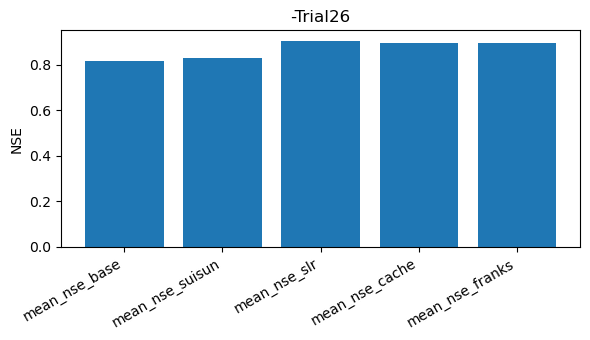

In [31]:
best = top.iloc[0]
sc_cols = ["mean_nse_base","mean_nse_suisun","mean_nse_slr","mean_nse_cache","mean_nse_franks"]
vals = best[sc_cols].astype(float).values
plt.figure(figsize=(6,3.5))
plt.bar(sc_cols, vals)
plt.ylabel("NSE"); plt.title(f"-{best['trial_name']}")
plt.xticks(rotation=30, ha="right"); plt.tight_layout()
plt.show()

/var/folders/p6/z8ptzv452zz42274h4l4zb4h0000gn/T/ipykernel_79662/3531069827.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cells)


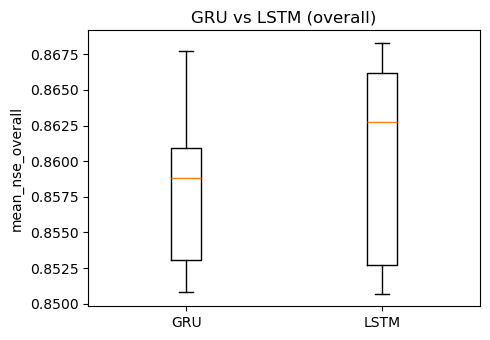

,mean_nse_base,mean_nse_suisun,mean_nse_slr,mean_nse_cache,mean_nse_franks,mean_nse_overall
cell,,,,,,
LSTM,0.805983,0.822158,0.902017,0.887192,0.884958,0.860475
GRU,0.807275,0.821375,0.896783,0.882700,0.882975,0.858208


In [32]:
cells = [g for g in df["cell"].unique() if pd.notnull(g)]
data = [df.loc[df["cell"]==c, "mean_nse_overall"].values for c in cells]
plt.figure(figsize=(5,3.5))
plt.boxplot(data, labels=cells)
plt.ylabel("mean_nse_overall"); plt.title("GRU vs LSTM (overall)")
plt.tight_layout(); plt.show()

by_cell = (df.groupby("cell")[["mean_nse_base","mean_nse_suisun","mean_nse_slr","mean_nse_cache","mean_nse_franks","mean_nse_overall"]].mean(numeric_only=True).sort_values("mean_nse_overall", ascending=False))
by_cell

              count      mean       std
freeze_multi                           
0                 8  0.862712  0.005476
1                 8  0.857875  0.006734
2                 8  0.857437  0.006105


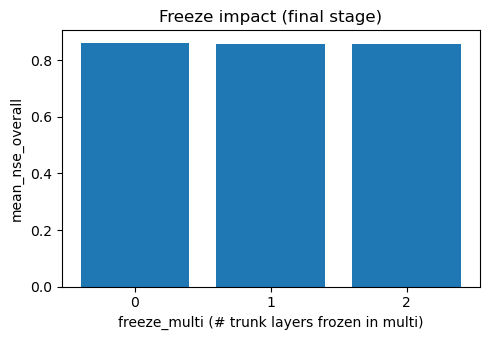

In [33]:
g = df.groupby("freeze_multi")["mean_nse_overall"].agg(["count","mean","std"]).sort_values("mean", ascending=False)
print(g)

plt.figure(figsize=(5,3.5))
plt.bar(g.index.astype(str), g["mean"])
plt.xlabel("freeze_multi (#base layers frozen in multi)")
plt.ylabel("mean_nse_overall")
plt.title("Freeze impact (final stage)")
plt.tight_layout(); plt.show()

              count      mean       std
freeze_multi                           
2                 8  0.822875  0.007197
1                 8  0.822300  0.008040
0                 8  0.820125  0.006814


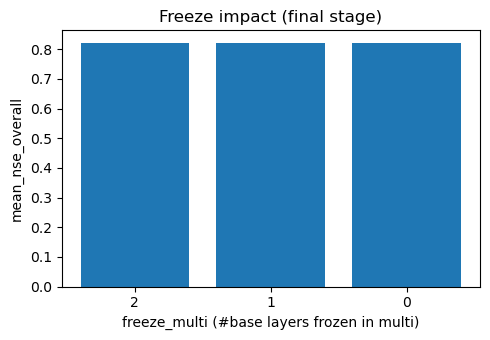

In [35]:
g = df.groupby("freeze_multi")["mean_nse_suisun"].agg(["count","mean","std"]).sort_values("mean", ascending=False)
print(g)

plt.figure(figsize=(5,3.5))
plt.bar(g.index.astype(str), g["mean"])
plt.xlabel("freeze_multi (#base layers frozen in multi)")
plt.ylabel("mean_nse_overall")
plt.title("Freeze impact (final stage)")
plt.tight_layout(); plt.show()